# Linear Regression Model

## Preprocess data
Load the dataset

In [3]:
import redivis
import pandas as pd
import matplotlib.pyplot as plt

user = redivis.user("cdpdemo")
dataset = user.dataset("climate_change_earth_surface_temperature_data:1e0a:v1_0")
table = dataset.table("global_temperatures_by_major_city:7x6x")

# Load table as a dataframe
df = table.to_pandas_dataframe()
df.head()

/opt/anaconda3/envs/CPSC-483/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1926-10-01,21.425,0.437,Cali,Colombia,4.02N,76.34W
1,1967-03-01,22.05,0.343,Cali,Colombia,4.02N,76.34W
2,1910-06-01,21.577,0.461,Cali,Colombia,4.02N,76.34W
3,1913-05-01,21.109,0.502,Cali,Colombia,4.02N,76.34W
4,1888-10-01,21.432,1.062,Cali,Colombia,4.02N,76.34W


In [4]:
df.shape

(239177, 7)

## Visualizing the Change in Temperature Around the World
From the same dataset we import the table with information of temperatures of the world

In [5]:
table_global = dataset.table("global_temperatures:5yc3")

global_df = table_global.to_pandas_dataframe()
global_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1802-05-01,10.457,1.82,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1785-12-01,1.873,1.909,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1840-11-01,4.101,0.982,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1825-01-01,3.213,1.913,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1816-06-01,11.79,1.087,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [6]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype               
---  ------                                     --------------  -----               
 0   dt                                         3192 non-null   date32[day][pyarrow]
 1   LandAverageTemperature                     3180 non-null   double[pyarrow]     
 2   LandAverageTemperatureUncertainty          3180 non-null   double[pyarrow]     
 3   LandMaxTemperature                         1992 non-null   double[pyarrow]     
 4   LandMaxTemperatureUncertainty              1992 non-null   double[pyarrow]     
 5   LandMinTemperature                         1992 non-null   double[pyarrow]     
 6   LandMinTemperatureUncertainty              1992 non-null   double[pyarrow]     
 7   LandAndOceanAverageTemperature             1992 non-null   double[pyarrow]     
 8   LandAndOceanAverageTemperatureUncertain

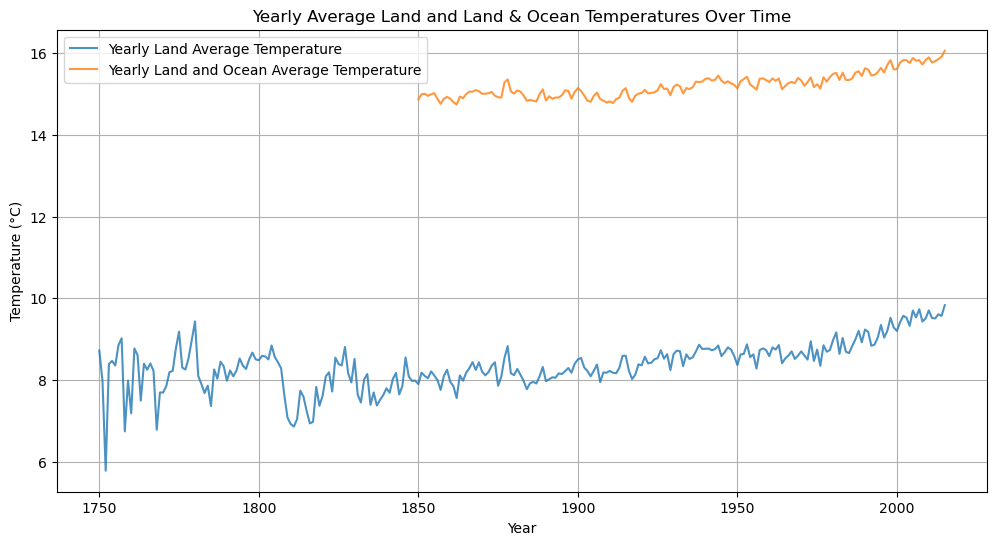

In [7]:
global_df['dt'] = pd.to_datetime(global_df['dt'])
# Extract the year from the date and add it as a new column
global_df['year'] = global_df['dt'].dt.year

# Group by year and calculate the mean temperature for each year
yearly_avg_temp = global_df.groupby('year')[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].mean().reset_index()

# Plotting the yearly averaged Land and Land & Ocean Temperatures
plt.figure(figsize=(12, 6))

# Plot Land Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAverageTemperature'], label='Yearly Land Average Temperature', alpha=0.8)

# Plot Land and Ocean Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAndOceanAverageTemperature'], label='Yearly Land and Ocean Average Temperature', alpha=0.8)

# Adding titles and labels
plt.title('Yearly Average Land and Land & Ocean Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype               
---  ------                         --------------   -----               
 0   dt                             239177 non-null  date32[day][pyarrow]
 1   AverageTemperature             228175 non-null  double[pyarrow]     
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]     
 3   City                           239177 non-null  string[pyarrow]     
 4   Country                        239177 non-null  string[pyarrow]     
 5   Latitude                       239177 non-null  string[pyarrow]     
 6   Longitude                      239177 non-null  string[pyarrow]     
dtypes: date32[day][pyarrow](1), double[pyarrow](2), string[pyarrow](4)
memory usage: 14.2 MB


In [9]:
df.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239172,False,True,True,False,False,False,False
239173,False,True,True,False,False,False,False
239174,False,True,True,False,False,False,False
239175,False,True,True,False,False,False,False


In [10]:
df.dropna(inplace=True)

### Drop all the empty rows
we have a lot of data and we consider that with our set of features we need to have them all available

In [11]:
df.shape

(228175, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 0 to 228174
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype               
---  ------                         --------------   -----               
 0   dt                             228175 non-null  date32[day][pyarrow]
 1   AverageTemperature             228175 non-null  double[pyarrow]     
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]     
 3   City                           228175 non-null  string[pyarrow]     
 4   Country                        228175 non-null  string[pyarrow]     
 5   Latitude                       228175 non-null  string[pyarrow]     
 6   Longitude                      228175 non-null  string[pyarrow]     
dtypes: date32[day][pyarrow](1), double[pyarrow](2), string[pyarrow](4)
memory usage: 15.5 MB


In [13]:
df.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,228175,228175.0,228175.0
mean,1914-05-09,18.125969,0.969343
min,1743-11-01,-26.772,0.04
25%,1869-12-01,12.71,0.34
50%,1918-08-01,20.428,0.592
75%,1966-02-01,25.918,1.32
max,2013-09-01,38.283,14.037
std,NaN,10.0248,0.979644


## Visualizing the data

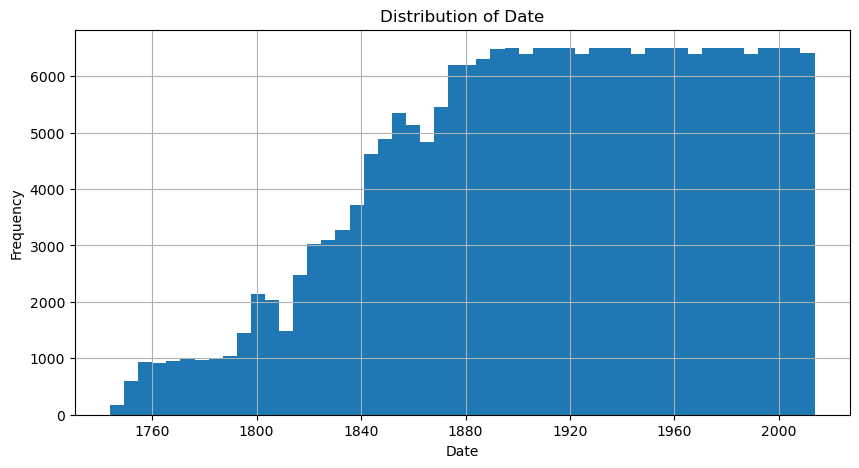

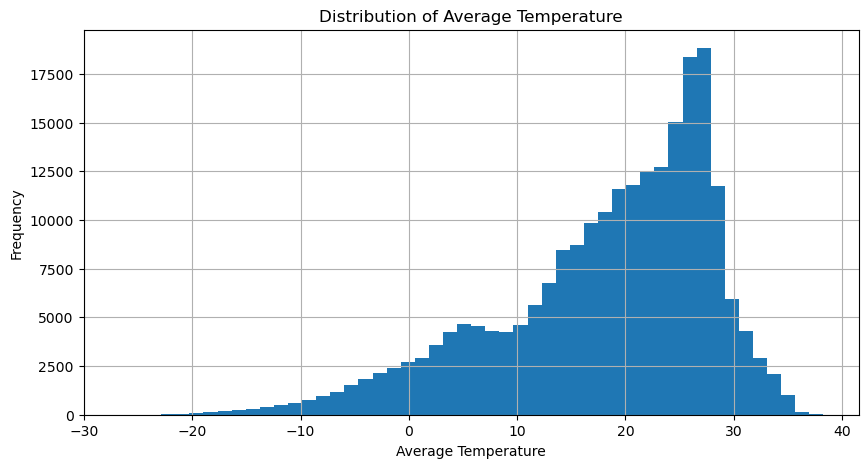

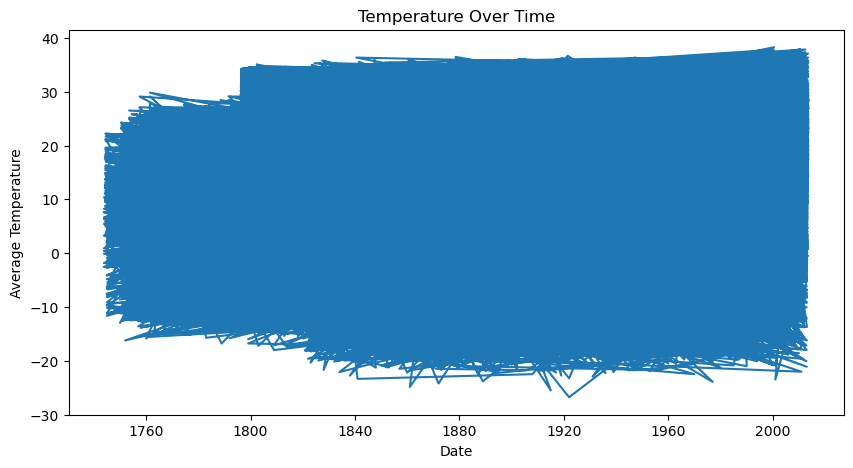

In [14]:
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for temperatures over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['dt']), df['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.show()

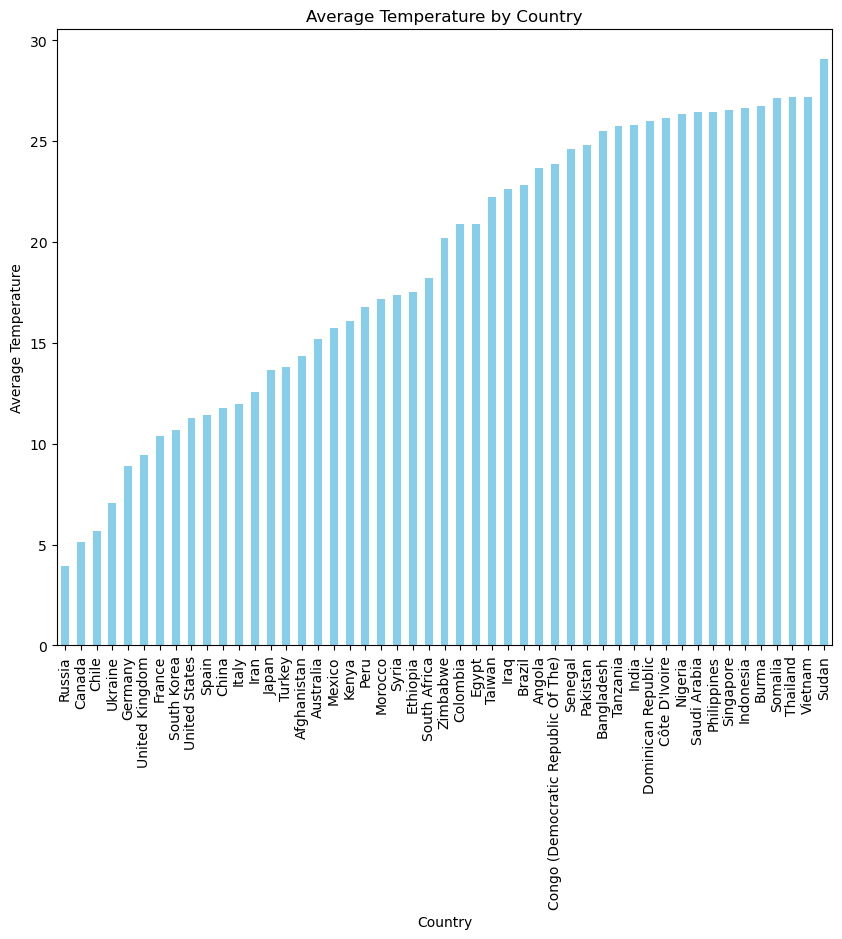

In [15]:
# Group data by country and calculate the mean temperature
country_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 8))
country_temp.plot(kind='bar', color='skyblue')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.show()

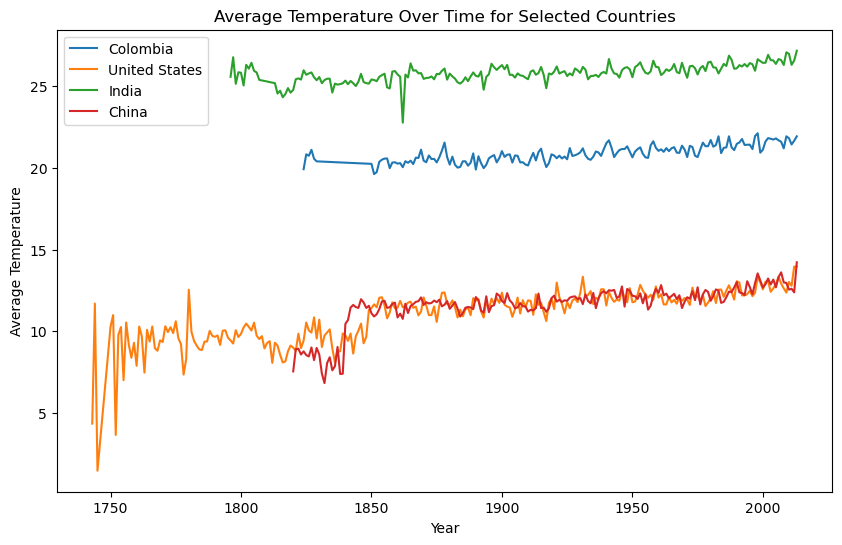

In [16]:
# Select a few countries to compare
selected_countries = ['Colombia', 'United States', 'India', 'China']  # Adjust with the countries you are interested in
df['dt'] = pd.to_datetime(df['dt'])  # Convert dt to datetime format
df['Year'] = df['dt'].dt.year  # Extract the year
df['Month'] = df['dt'].dt.month

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = df[df['Country'] == country].groupby('Year')['AverageTemperature'].mean()
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time for Selected Countries')
plt.legend()
plt.show()

## Finding correlation

In [17]:
# Function to convert latitude and longitude into numeric
def convert_lat_lon(value):
    if value[-1] in ['N', 'E']:
        return float(value[:-1])  # North and East are positive
    else:
        return -float(value[:-1])  # South and West are negative

# Apply the function to Latitude and Longitude columns
df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
# df = pd.get_dummies(df, columns=['Country', 'City'], drop_first=True)

# Keep only the numeric columns, including 'Timestamp'
copy_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = copy_df.corr(method="pearson")

# Display the correlation matrix
print(correlation_matrix)

                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.199380   
Latitude                                -0.393060   
Longitude                                0.090916   

                               AverageTemperatureUncertainty  Latitude  \
AverageTemperature                                  -0.19938 -0.393060   
AverageTemperatureUncertainty                        1.00000  0.188840   
Latitude                                             0.18884  1.000000   
Longitude                                           -0.09225  0.091125   

                               Longitude  
AverageTemperature              0.090916  
AverageTemperatureUncertainty  -0.092250  
Latitude                        0.091125  
Longitude                       1.000000  


### Encode categorical vaiables
Encoding City and Country

In [18]:
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 0 to 228174
Data columns (total 56 columns):
 #   Column                                      Non-Null Count   Dtype          
---  ------                                      --------------   -----          
 0   dt                                          228175 non-null  datetime64[ns] 
 1   AverageTemperature                          228175 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty               228175 non-null  double[pyarrow]
 3   City                                        228175 non-null  string[pyarrow]
 4   Latitude                                    228175 non-null  float64        
 5   Longitude                                   228175 non-null  float64        
 6   Year                                        228175 non-null  int32          
 7   Month                                       228175 non-null  int32          
 8   Country_Angola                              228175 non-null  bool[pya

In [19]:
# A peek into our data
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1926-10-01,21.425,0.437,Cali,Colombia,4.02,-76.34,1926,10
1,1967-03-01,22.05,0.343,Cali,Colombia,4.02,-76.34,1967,3
2,1910-06-01,21.577,0.461,Cali,Colombia,4.02,-76.34,1910,6
3,1913-05-01,21.109,0.502,Cali,Colombia,4.02,-76.34,1913,5
4,1888-10-01,21.432,1.062,Cali,Colombia,4.02,-76.34,1888,10


## Training the model with multiple features

### Selecting the features

In [25]:
# Define features and target
X = df[['Year','Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

### Splitting the data and fitting the model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/finalized_model_M1.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(result)


0.18494897745894046


## Training the model with less features

In [29]:
# Define features and target
X = df[['Year']]
y = df['AverageTemperature']  # Target variable

### Splitting the data and fitting the model with less feartures

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/finalized_model_M2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(result)


0.019791387939099292
